In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import json

In [63]:
data = pd.read_csv('data_677.csv')

In [64]:
display(data.head())

,id,type,payload,created_at,status,creator_id,inspector,project_id,schedule_state,reliability,inspector_count
0,7acb1948-a5f6-41f1-8010-d336c6e91d23,image,"{""meta"": {""crop_image"": [{""correct"": [1], ""sha...",2019-10-13T08:41:57+09:00,done,b1af665e-b6f9-4b17-82fd-cc5c5421a632,{b1af665e-b6f9-4b17-82fd-cc5c5421a632},4ff5f94d-694d-420e-b7d6-0ccad18eb1f1,queued,0,1
1,0b17d0c0-4231-4796-862e-d0791576ee7d,image,"{""meta"": {""crop_image"": [{""correct"": [1], ""sha...",2019-10-13T09:14:00+09:00,done,c2cf64b2-8534-4ab5-a883-a1d3410afdba,{c2cf64b2-8534-4ab5-a883-a1d3410afdba},4ff5f94d-694d-420e-b7d6-0ccad18eb1f1,queued,0,1
2,4490fe3e-0c28-4e55-adbe-e79d10ec429e,image,"{""meta"": {""crop_image"": [{""correct"": [1], ""sha...",2019-10-13T09:22:24+09:00,done,d65f0a4e-7815-4194-a347-2ad0f7841f74,{b1af665e-b6f9-4b17-82fd-cc5c5421a632},4ff5f94d-694d-420e-b7d6-0ccad18eb1f1,queued,0,1
3,a21c58ce-2539-40fd-9624-c1182dc07b95,image,"{""meta"": {""crop_image"": [{""correct"": [1], ""sha...",2019-10-13T09:23:53+09:00,done,bd88f55c-4046-41ad-8b63-70b6a9e25121,{b1af665e-b6f9-4b17-82fd-cc5c5421a632},4ff5f94d-694d-420e-b7d6-0ccad18eb1f1,queued,0,1
4,3ddbbb93-8127-4801-b90e-3eacc139e6d4,image,"{""meta"": {""crop_image"": [{""correct"": [0], ""sha...",2019-10-13T09:25:36+09:00,failure,bd88f55c-4046-41ad-8b63-70b6a9e25121,{5d4b121c-d331-4c64-8811-524a38e3e31b},4ff5f94d-694d-420e-b7d6-0ccad18eb1f1,queued,0,1


In [65]:
ai_user =['9cfbafa3-609c-44a2-bb85-d9408a14e5e5', 'd65f0a4e-7815-4194-a347-2ad0f7841f74']
not_ai_user = ['1582fde8-f56c-49a1-8fed-64ff833115cd', '5068ee0b-2372-4c83-b5b0-cb0279e00025', 'bd88f55c-4046-41ad-8b63-70b6a9e25121']
total_data = pd.DataFrame({},\
                    columns=['id', 'no', 'prob', 'human_label', 'human_len', 'ai_label', 'ai_len', 'crop_time', 'image_time', 'similarity', 'correct', 'use_ai'])

In [66]:
total_data.shape

(0, 12)

In [86]:
index = 0
for i in data.index:
    meta_dict = json.loads(data.loc[i].payload)

    sum_crop_time = 0
    for image_data in meta_dict['meta']['crop_image']:
        sum_crop_time += image_data['region_attributes']['crop_time']
    
    for image_data in meta_dict['meta']['crop_image']:
        if len(image_data['region_attributes']['label']) == 0:
            continue
        row = dict()
        
        row['id'] = data.loc[i].id
        row['no'] = image_data['shape_attributes']['id']
        row['prob'] = image_data['region_attributes']['prob']
        row['human_label'] = image_data['region_attributes']['label']
        row['human_len'] = int(len(image_data['region_attributes']['label']))
        row['ai_label'] = image_data['region_attributes']['ai_label']
        row['ai_len'] = int(len(image_data['region_attributes']['ai_label']))
        row['crop_time'] = image_data['region_attributes']['crop_time']
        row['image_time'] = image_data['region_attributes']['image_time'] \
                            *(row['crop_time'] / sum_crop_time)
        row['similarity'] = image_data['region_attributes']['similarity']
        row['correct'] = int(image_data['correct'][-1])
        
        if data.loc[i].creator_id in ai_user:
            row['use_ai'] = 1
        elif data.loc[i].creator_id in not_ai_user:
            row['use_ai'] = 0
        else:
            row['use_ai'] = None
            
        total_data.loc[index] = row
        index+=1

In [97]:
ai_user =['9cfbafa3-609c-44a2-bb85-d9408a14e5e5', 'd65f0a4e-7815-4194-a347-2ad0f7841f74']
not_ai_user = ['1582fde8-f56c-49a1-8fed-64ff833115cd', '5068ee0b-2372-4c83-b5b0-cb0279e00025', 'bd88f55c-4046-41ad-8b63-70b6a9e25121']

image_ai_user = pd.DataFrame({}, columns=['use_ai'])
image_not_ai_user = pd.DataFrame({}, columns=['use_ai'])

ai_index = 0
not_ai_index = 0

for i in data.index:
    if data.loc[i].creator_id in ai_user:
        image_ai_user.loc[ai_index] = 1
        ai_index += 1
    elif data.loc[i].creator_id in not_ai_user:
        image_not_ai_user.loc[not_ai_index] = 0
        not_ai_index += 1

In [89]:
total_data.count()

id             3759
no             3759
prob           3759
human_label    3759
human_len      3759
ai_label       3759
ai_len         3759
crop_time      3759
image_time     3759
similarity     3759
correct        3759
use_ai         3107
dtype: int64

In [69]:
total_data['use_ai'] = total_data.apply(lambda row: 1 if row.use_ai == 1 else 0, axis=1)

In [90]:
ai_group = total_data[total_data.use_ai == 1]['use_ai']
not_ai_group = total_data[total_data.use_ai == 0]['use_ai']

In [91]:
ai_group.count()

1267

In [92]:
not_ai_group.count()

1839

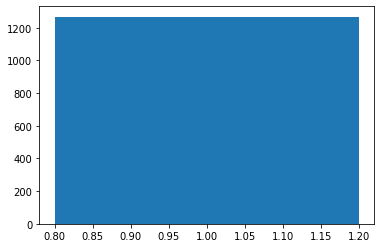

In [85]:
plt.bar(ai_group, ai_group.count(), width=0.4)
plt.show()

Text(0.5, 1.0, 'Comparison between ai_user and non_ai_user')

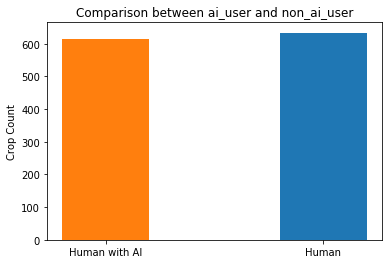

In [95]:
ax = plt.subplot()
plt.bar(ai_group, ai_group.count()/ 2, width=0.4)
plt.bar(not_ai_group, not_ai_group.count()/ 3, width=0.4)
ax.set_xticks(range(2))
ax.set_xticklabels(['Human with AI', 'Human'])
plt.ylabel('Crop Count')
plt.title('Comparison between ai_user and non_ai_user')

In [94]:
ai_group.count()

1267

Text(0.5, 1.0, 'Comparison between ai_user and non_ai_user')

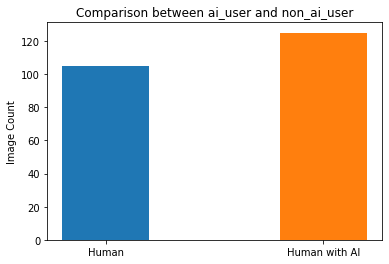

In [100]:
ax = plt.subplot()
plt.bar(image_not_ai_user.use_ai, image_not_ai_user.use_ai.count()/ 3, width=0.4)
plt.bar(image_ai_user.use_ai, image_ai_user.use_ai.count() / 2, width=0.4)
ax.set_xticks(range(2))
ax.set_xticklabels(['Human', 'Human with AI'])
plt.ylabel('Image Count')
plt.title('Comparison between ai_user and non_ai_user')

In [104]:
len(image_not_ai_user) / 3

104.66666666666667

In [105]:
len(image_ai_user) / 2

125.0

In [103]:
image_ai_user.use_ai.count() / image_not_ai_user.use_ai.count()

0.7961783439490446

In [37]:
users_group_ai.use_ai = users_group_ai.apply(lambda row: 1 if row.use_ai  else 0, axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [62]:
features = total_data[['prob', 'human_len', 'ai_len', 'crop_time', 'image_time', 'similarity']]
labels = total_data.correct * (-1)

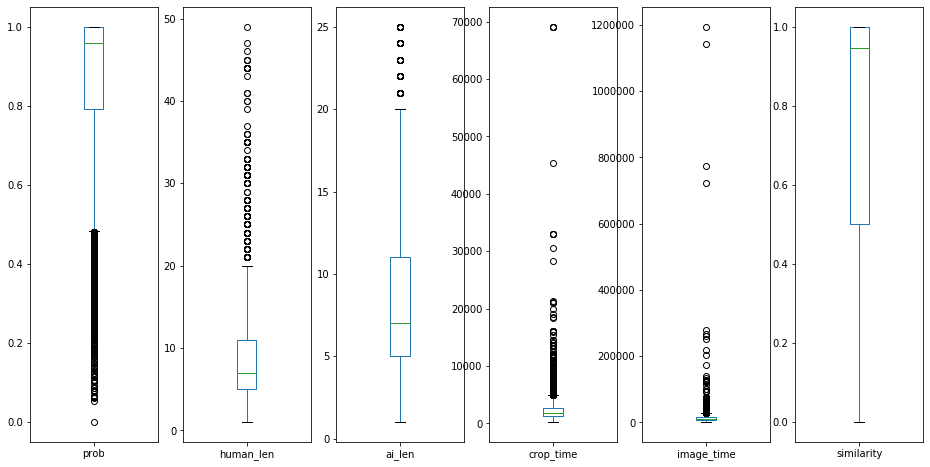

In [63]:
fig, ax = plt.subplots(1, 6, figsize=(16,8))

for i, col in enumerate(features.columns):
    features[col].plot.box(ax=ax[i])

In [64]:
total_data = total_data[total_data['human_len'] <= 20]
total_data = total_data[total_data['ai_len'] <= 20]
total_data = total_data[total_data['crop_time'] <= 10000]
total_data = total_data[total_data['image_time'] <= 200000]

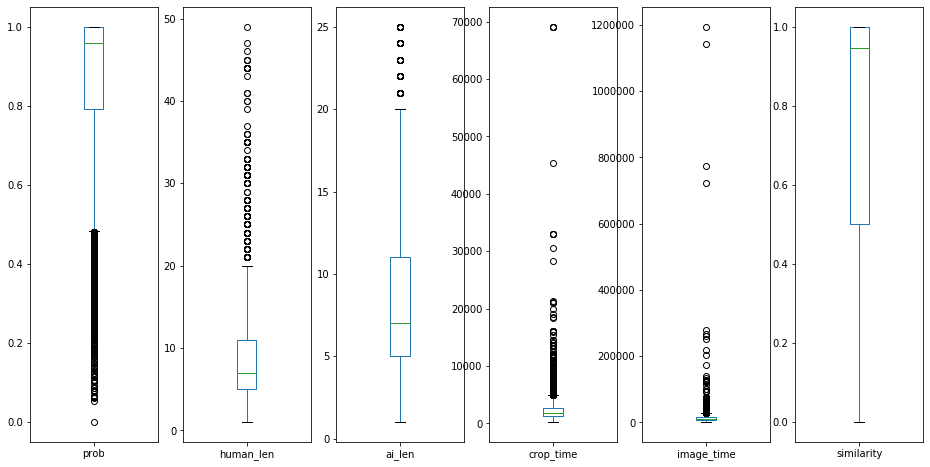

In [65]:
fig, ax = plt.subplots(1, 6, figsize=(16,8))

for i, col in enumerate(features.columns):
    features[col].plot.box(ax=ax[i])

In [74]:
features = total_data[['prob', 'human_len', 'ai_len', 'crop_time', 'image_time', 'similarity', 'correct']]

In [67]:
robust = RobustScaler()
total_data[['prob', 'human_len', 'ai_len', 'crop_time', 'image_time', 'similarity']] =\
robust.fit_transform(total_data[['prob', 'human_len', 'ai_len', 'crop_time', 'image_time', 'similarity']])

In [75]:
display(features)

,prob,human_len,ai_len,crop_time,image_time,similarity,correct
0,0.212430,0.333333,0.4,-0.234585,0.060377,0.121693,0
1,0.120580,0.666667,0.6,0.202693,0.547058,0.000000,0
2,-2.564091,-0.166667,-0.2,-0.391212,-0.113945,-2.433862,0
3,-3.461459,0.666667,0.4,-0.076541,0.236276,-1.156085,0
4,0.212919,0.000000,0.0,0.746988,0.667587,0.121693,1
...,...,...,...,...,...,...,...
4518,-1.848566,0.500000,0.4,0.448618,0.824878,-1.895851,1
4519,-2.553145,1.833333,1.2,-0.239546,0.057326,-0.785117,1
4520,-2.187825,1.833333,1.6,-0.150957,0.156135,-2.433862,1
4521,-0.537705,1.166667,1.2,-0.564139,-0.304712,-0.162257,1


In [76]:
features['correct'] = features.apply(lambda x: 0 if x.correct > 0.5 else 1, axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
display(features.head())

,prob,human_len,ai_len,crop_time,image_time,similarity,correct
0,0.212430,0.333333,0.4,-0.234585,0.060377,0.121693,1
1,0.120580,0.666667,0.6,0.202693,0.547058,0.000000,1
2,-2.564091,-0.166667,-0.2,-0.391212,-0.113945,-2.433862,1
3,-3.461459,0.666667,0.4,-0.076541,0.236276,-1.156085,1
4,0.212919,0.000000,0.0,0.746988,0.667587,0.121693,0


In [80]:
features['pred'] = features.apply(lambda row:\
                                  -0.0632684200437098 * row.prob +\
                                  -0.263687136584231* row.human_len+\
                                  0.212213502241637* row.ai_len+\
                                  -0.0230254681509159* row.crop_time+\
                                  -0.160075973021105*row.similarity+\
                                  0.0853052747319063, axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [92]:
len(features[features.correct == (features.pred > 0.5)])

3850

In [88]:
len(features[features.correct == (features.pred > 0.5)]) / len(features)

0.902696365767878

In [93]:
features['pred2'] = features.apply(lambda row:\
                                  -0.06331 * row.prob +\
                                  -0.26210 * row.human_len+\
                                  0.21149  * row.ai_len+\
                                  -0.01497 * row.crop_time+\
                                   -0.01099 * row.image_time+\
                                  -0.15965  *row.similarity+\
                                  0.08638, axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
len(features[features.correct == (features.pred2 > 0.5)])

3852

In [101]:
len(features[features.correct == (features.pred2 > 0.5)]) / len(features)

0.9031652989449004

In [94]:
display(features)

,prob,human_len,ai_len,crop_time,image_time,similarity,correct,pred,pred2
0,0.212430,0.333333,0.4,-0.234585,0.060377,0.121693,1,0.054776,0.053580
1,0.120580,0.666667,0.6,0.202693,0.547058,0.000000,1,0.024546,0.021860
2,-2.564091,-0.166667,-0.2,-0.391212,-0.113945,-2.433862,1,0.647647,0.645773
3,-3.461459,0.666667,0.4,-0.076541,0.236276,-1.156085,1,0.400224,0.398506
4,0.212919,0.000000,0.0,0.746988,0.667587,0.121693,0,0.035154,0.034953
...,...,...,...,...,...,...,...,...,...
4518,-1.848566,0.500000,0.4,0.448618,0.824878,-1.895851,0,0.448453,0.443850
4519,-2.553145,1.833333,1.2,-0.239546,0.057326,-0.785117,0,0.149263,0.149591
4520,-2.187825,1.833333,1.6,-0.150957,0.156135,-2.433862,0,0.472919,0.471869
4521,-0.537705,1.166667,1.2,-0.564139,-0.304712,-0.162257,0,0.105309,0.106125


In [90]:
(len(features) - sum(features.correct)) / len(features)

0.7854630715123095

In [77]:
features.correct.sum()

915

In [78]:
features.to_csv('scaled_check_bic.csv')

In [32]:
#total_data.to_csv('data_label.csv')

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [410]:
human_tfidf = TfidfVectorizer(token_pattern="[\s\w'%&^$-`!\"]+", lowercase=False, stop_words='english')
ai_tfidf = TfidfVectorizer(token_pattern="[\s\w'%&^$-`!\"]+",lowercase=False, stop_words='english')

In [411]:
human_tfidf_matrix = human_tfidf.fit_transform(total_data.human_label)
ai_tfidf_matrix = ai_tfidf.fit_transform(total_data.ai_label)

In [412]:
print(tfidf_matrix.shape)
print(human_tfidf_matrix.shape)
print(ai_tfidf_matrix.shape)

(4523, 2776)
(4523, 2305)
(4523, 2751)


In [424]:
wrongs = list()
for i in total_data.index:
    try:
        human_tfidf.get_feature_names().index(total_data.loc[i].human_label)
    except:
        print(total_data.loc[i].human_label)
        wrongs.append(total_data.loc[i].human_label)

one
one
one
made
or
one
nothing
more
the


In [429]:
for wrong in wrongs:
    try:
        print(human_tfidf.fit(wrong))
    except:
        print(wrong, len(wrong), "error")

one 3 error
one 3 error
one 3 error
made 4 error
or 2 error
one 3 error
nothing 7 error
more 4 error
the 3 error


In [414]:
for i in total_data.index:
    try:
        ai_tfidf.get_feature_names().index(total_data.loc[i].ai_label)
    except:
        print(i)
        break

11


In [415]:
print(human_tfidf.get_feature_names())

[' Calbee', ' modern baking', '"butter-like" flavored popcorn', '& CREAM', '& Chocolate Chips', '& LESS OIL', '& NON-DAIRY', '& ONION', '& ORGANIC SUGAR', '& Onion', '& PEANUT', '& ROLLED OATS', '& SALTY', '& SOUR CREAM', '& Sea Salt', '& onion', '&-Dark_Chocolate', '&GO!', "'n", '- 2 PACK -', '-SEA SALT-', '-VALUE-', '0g', '0g TRANS FAT', '0g Trans Fat', '1', '1.42kg', '1.588kg', '10', '10% Calcium', '100', '100%', '100% ARABICA MEDIUM ROAST', '100% CHEESE...NOTHING ELSE', '100% COLOMBIAN', '100% Natural', '100% Profits to Charity', '100% RDA of Vitamin C', '100% Vitamin C', '100% WHOLE GRAIN', '100%Natural', '100%natural', '100000', '11', '110', '110 Calories', '12', '12 BIG COOKIES', '12 CAKES', '12 energy bars', '12packs', '13', '140', '142g', '14g PROTEIN', '15g PROTEIN', "16g of whole grain'", '170', '18 BAGS', '18 Chocolate', '18 Vanilla', '18BARS', '18G', '1g of Fat', '2', '2 Dates', '2 off admission', '2/$1', '20', '20%', '22', '222', '23', '238.5g', '24', '25 COunt', '25 Coun

In [416]:
print(ai_tfidf.get_feature_names())

['"ArtificialandNNatural', '"Go', '"SUGARFREE', '%assina.Frut.bus.ck', '&-Dark_Chocolate', '&CREAM', '&NON-DAIRY', '&SeaSalt', '&onion', "'I", '(', '(GF', '(GF)', '(Great', '(JE', '(Jolly', '(Keebler', '(TALLANWAFFLECOOLIF', '(doinRRS.', '(mmunity', '(rackers', '-', '-007', '-2PACK-', '-JUMBO-', '-SEASALTE', '-VALUE-', '-alted', '/eryBerryBlend', '0', '1.42kg', '1.588kg', '10', '100', '100%', '100%Natural', '100%VVitaminc', '100%VVttmmin(', '100%Vitaminc', '100%natural', '1000-Profits@Charity', '100000', '1008.RDAofVitamincc', '100X-COLOMBIAN', '100xJVitaminc', '10x1CCalcium', '110', '110CClarories', '12', '12CAKES', '12energybars', '12packs', '140', '142g', '15,000PRIZES!', '15-PPOOTEIN', '170', '18/Vanilla', '186', '18BARS', '18]Chocolate', '18chocolate', '18vanillar', '1993', '1SBAGS', '2.00!', '2/$1', '20', '20%', '24', '25%/Vitaminsage', '259/Vitaminsade', '25:-Vitimsins-ED', '25CCuunt', '25Count', '25Y6Vitaminsage', '283.5g', '2Dates', '2offadmission', '2packs', '3', '34', '36', 

In [437]:
from sklearn.metrics.pairwise import linear_kernel

In [438]:
cosine_sim = linear_kernel(human_tfidf_matrix.T, ai_tfidf_matrix.T)

In [439]:
print(cosine_sim)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [440]:
# 세로 : human_label, 가로 : ai_label
cosine_sim.shape

(2305, 2751)

In [441]:
for i in total_data.index:
    try:
        h_index = human_tfidf.get_feature_names().index(total_data.loc[i].human_label)
        ai_index = ai_tfidf.get_feature_names().index(total_data.loc[i].ai_label)
        similarity = cosine_sim[h_index][ai_index]

        total_data.loc[i].similarity = similarity
    except:
        print(i, "error")
        continue

11 error
25 error
26 error
28 error
48 error
74 error
91 error
101 error
102 error
119 error
123 error
126 error
152 error
153 error
155 error
165 error
167 error
184 error
185 error
193 error
215 error
216 error
229 error
230 error
231 error
258 error
274 error
282 error
283 error
285 error
286 error
316 error
344 error
345 error
346 error
347 error
348 error
349 error
374 error
424 error
425 error
427 error
463 error
464 error
467 error
474 error
475 error
495 error
501 error
508 error
510 error
511 error
512 error
513 error
514 error
519 error
526 error
565 error
610 error
672 error
687 error
688 error
690 error
756 error
777 error
806 error
808 error
828 error
872 error
873 error
898 error
900 error
901 error
914 error
915 error
916 error
917 error
949 error
950 error
966 error
968 error
969 error
970 error
989 error
990 error
1010 error
1047 error
1054 error
1063 error
1097 error
1098 error
1100 error
1119 error
1120 error
1152 error
1182 error
1239 error
1241 error
1267 error
126

In [434]:
display(total_data.similarity)

0              1
1       0.952381
2              0
3            0.5
4              1
          ...   
4518    0.210526
4519    0.645161
4520           0
4521    0.888889
4522    0.235294
Name: similarity, Length: 4523, dtype: object

In [435]:
total_data.to_csv('data_label.csv')

In [73]:
print(cosine_sim.sum())

4726.240090374048


In [92]:
for i in range(10):
    print(cosine_sim[i][i])

1.0
1.0000000000000004
1.0
0.9999999999999998
1.0
1.0
0.9999999999999998
1.0
0.0
1.0


In [72]:
for i in cosine_sim[1]:
    if i != 0:
        print(i)

0.6402075409187968
0.6402075409187968
0.6402075409187968
